In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
churn=pd.read_csv('Churn_Modelling.csv')
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
churn.shape

(10000, 14)

In [6]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
churn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

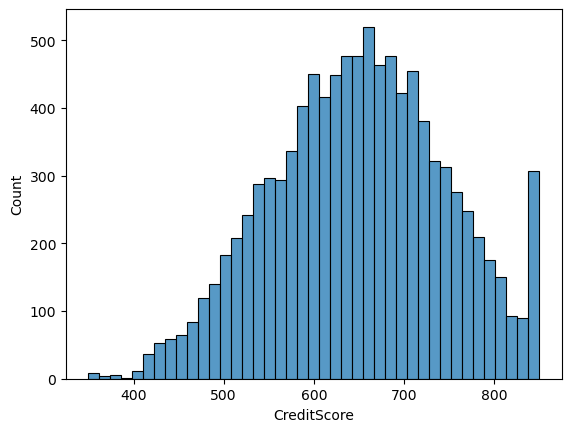

In [9]:
sns.histplot(x='CreditScore',data=churn)

<AxesSubplot:xlabel='Geography', ylabel='Count'>

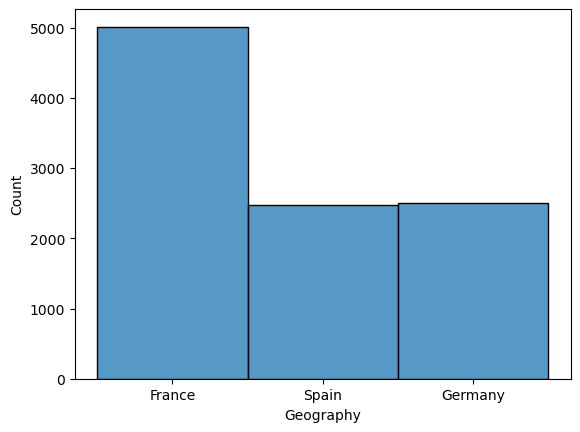

In [10]:
sns.histplot(x='Geography',data=churn)

<AxesSubplot:xlabel='Tenure', ylabel='Count'>

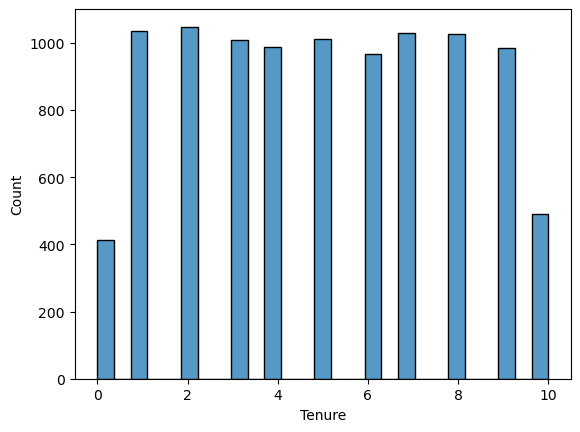

In [11]:
sns.histplot(x='Tenure',data=churn)

<AxesSubplot:xlabel='Balance', ylabel='Count'>

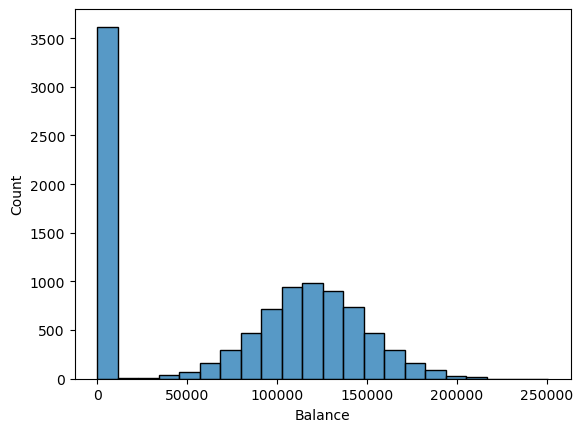

In [12]:
sns.histplot(x='Balance',data=churn)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

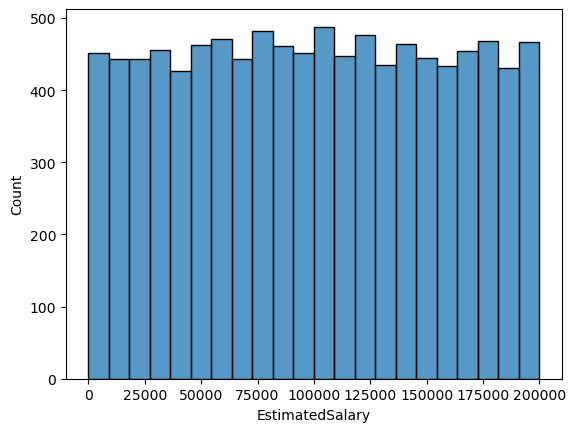

In [13]:
sns.histplot(x='EstimatedSalary',data=churn)

<AxesSubplot:xlabel='Exited', ylabel='count'>

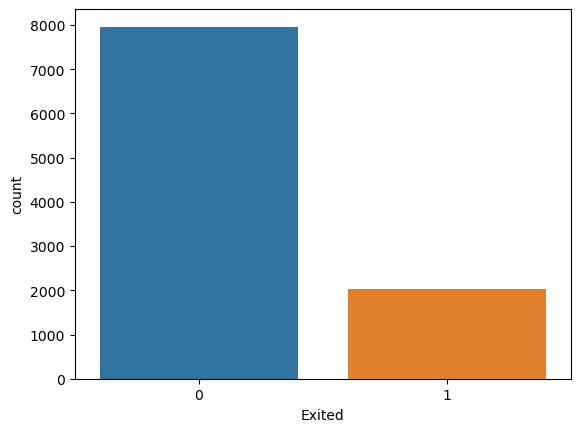

In [14]:
sns.countplot(x='Exited',data=churn)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

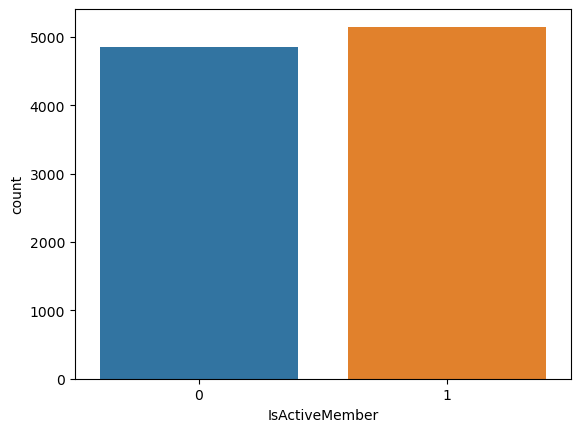

In [15]:
sns.countplot(x='IsActiveMember',data=churn)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

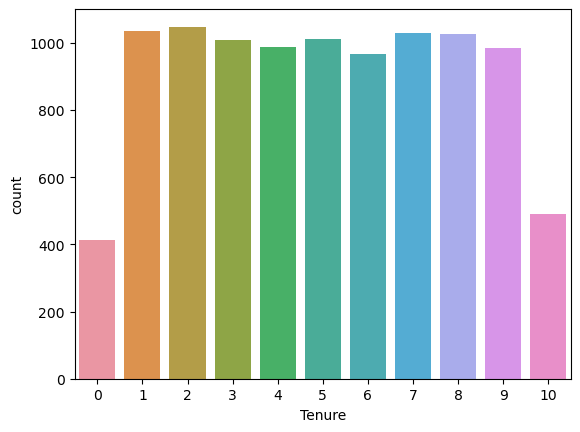

In [16]:
sns.countplot(x='Tenure',data=churn)

In [17]:
correlation=churn.corr()

<AxesSubplot:>

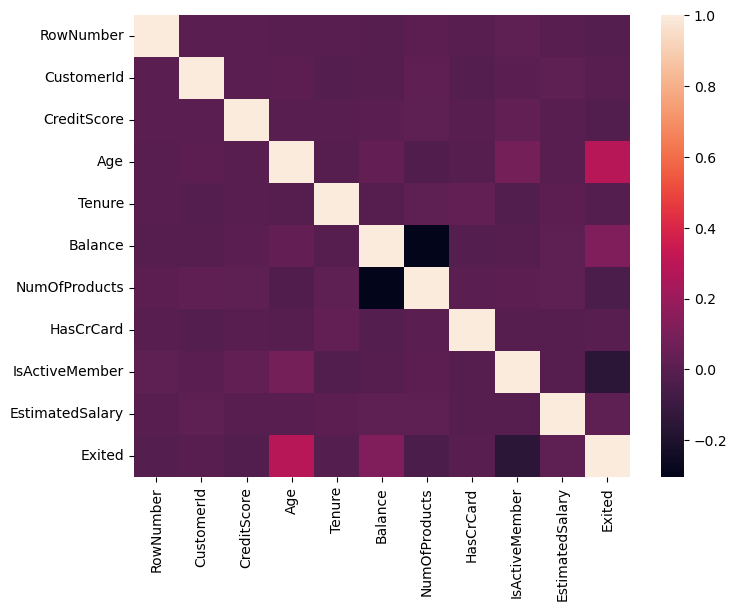

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(churn.corr())

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
churn['Geography']=le.fit_transform(churn['Geography'])
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,Male,42,3,75075.31,2,1,0,92888.52,1


In [21]:
churn['Gender']=le.fit_transform(churn['Gender'])
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [22]:
x=churn.drop(['RowNumber','CustomerId','Surname','Age','Exited'],axis=1)
x

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,2,0.00,1,1,1,101348.88
1,608,2,0,1,83807.86,1,0,1,112542.58
2,502,0,0,8,159660.80,3,1,0,113931.57
3,699,0,0,1,0.00,2,0,0,93826.63
4,850,2,0,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...
9995,771,0,1,5,0.00,2,1,0,96270.64
9996,516,0,1,10,57369.61,1,1,1,101699.77
9997,709,0,0,7,0.00,1,0,1,42085.58
9998,772,1,1,3,75075.31,2,1,0,92888.52


In [23]:
y=churn['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [24]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [25]:
x.shape,X_train.shape,X_test.shape

((10000, 9), (8000, 9), (2000, 9))

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
x_train=scaler.fit_transform(X_train)
X_train

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4643,597,0,0,0,131778.08,1,0,0,10703.53
2390,602,1,1,7,184715.86,2,1,0,113781.99
6162,748,0,1,5,84009.47,1,1,1,137001.10
8678,518,0,0,9,85146.36,1,0,0,2803.89
6944,850,1,1,7,102800.72,1,1,1,87352.43
...,...,...,...,...,...,...,...,...,...
8772,768,0,1,6,0.00,2,1,1,199454.37
163,721,2,0,2,0.00,2,1,1,106977.80
6012,738,0,0,3,0.00,2,1,0,67484.16
6558,686,0,1,0,138131.34,1,0,1,115927.85


In [29]:
X_test=scaler.fit_transform(X_test)
X_test

array([[-1.19798197,  1.50942597, -1.06725697, ..., -1.57617276,
         0.96173168, -0.35306673],
       [-0.1665862 ,  0.30140198,  0.93698147, ...,  0.63444822,
        -1.03979106,  1.16592092],
       [ 0.39120947, -0.906622  , -1.06725697, ...,  0.63444822,
        -1.03979106,  1.32179949],
       ...,
       [-1.41899535,  1.50942597,  0.93698147, ...,  0.63444822,
         0.96173168, -0.06059571],
       [-0.1665862 ,  1.50942597,  0.93698147, ...,  0.63444822,
         0.96173168,  0.09649546],
       [-0.20868399, -0.906622  ,  0.93698147, ..., -1.57617276,
        -1.03979106, -1.44603576]])

In [30]:
gb=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [31]:
gb.fit(X_train,y_train)
X_train_pred=gb.predict(X_train)
score=accuracy_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

gb.fit(X_test,y_test)
X_test_pred=gb.predict(X_test)
score=accuracy_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 0.83675
accuracy score of test data: 0.8655


In [36]:
input_data=(602,1,1,7,184715.86,2,1,0,113781.99)
input_data_as_np=np.asarray(input_data)
input_data_reshaped=input_data_as_np.reshape(1,-1)
prediction=gb.predict(input_data_reshaped)
prediction

array([1], dtype=int64)

In [37]:
if(prediction[0]==1):
    print('Customer left the bank')
else:
    print('Not left the bank')

Customer left the bank
